## Finite Difference Scheme for Diffusion

Consider the diffusion equation $$\dfrac{\partial u}{\partial t}=\epsilon^2 \dfrac{\partial^2 u}{\partial x^2}$$

Here use the forward-time and central-space finite difference scheme.

$$\dfrac{\partial u}{\partial t}(x_i,t_k) \approx \dfrac{u^{k+1}_i-u^k_i}{\Delta t}$$


$$\dfrac{\partial^2 u}{\partial x^2}(x_i,t_k) \approx \dfrac{u^k_{i-1}-2u^k_i+u^k_{i+1}}{(\Delta x)^2}$$

hence, the full scheme is $$\dfrac{u^{k+1}_i-u^k_i}{\Delta t}= \epsilon^2 \left(\dfrac{u^k_{i-1}-2u^k_i+u^k_{i+1}}{(\Delta x)^2}\right)$$

$$u^{k+1}_i = u^k_i + \epsilon^2 \dfrac{\Delta t}{(\Delta x)^2} (u^k_{i-1}-2u^k_i+u^k_{i+1})$$

In the vector form $U^k=[u^k_0,u^k_1,\dots,u^k_{n-1},u^k_{n}]^T$

## Periodic Boundary Condition
\begin{equation}\displaystyle
    \begin{cases}
        u_t - u_{xx} = 0, &\text{for } x\in [0,L], t\geq 0, \\
        u(0+x,t)=u(L+x,t), &\text{for } t > 0, \\
        u(x,0)=f(x), &\text{for } x\in[0,L].
    \end{cases}
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.sparse import diags


# Set up the parameters
nx = 51   # number of grid points in x-direction
L = 1     # length of the domain in each direction
dx = L / (nx - 1)   # grid spacing in x-direction
x = np.linspace(0, L, nx)   # x-coordinates of the grid points

dt = 1e-8      # time step
timesteps = 10**3   # number of time steps

# Adevction equation
# k = dt/dx
# diagonals = [(1-k)*np.ones(nx), k*np.ones(nx)]
# offsets = [0, -1]
# K = diags(diagonals, offsets, shape=(nx, nx), format='csr')
# K[0,-2]=k


# Diffusion eqaution with periodic
k = dt/(dx**2)
diagonals = [k*np.ones(nx), (1-2*k)*np.ones(nx), k*np.ones(nx)]
offsets = [-1, 0, 1]
K_periodic = diags(diagonals, offsets, shape=(nx, nx), format='csr')
K_periodic[0,-2] = k
K_periodic[-1,1] = k

u0 = np.sin(2*np.pi*x)

C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [2]:
# iteration

u_prev = u0
periodic_mass_list = []
history_u = [u0]
for i in range(0, timesteps):
    u = K_periodic * u_prev
    periodic_mass_list.append(sum(u0-u) * dx)
    history_u.append(u)
    u_prev = u

In [3]:
# fig, ax = plt.subplots(4,1, figsize=(10,10))
# ax[0].plot(history_u[0])
# ax[1].plot(history_u[int(np.ceil(timesteps/4))])
# ax[2].plot(history_u[int(np.ceil(timesteps/2))])
# ax[3].plot(history_u[-1])
# plt.setp(ax, ylim=[-1.1,1.1])
# plt.show()

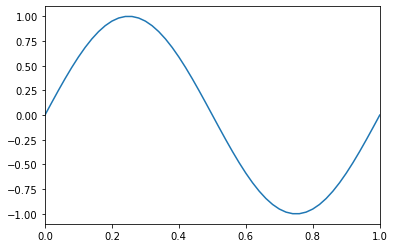

In [4]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0,L)
ax.set_ylim(-1.1, 1.1)
line, = ax.plot(0,0)

def animate(i):
    line.set_xdata(x)
    line.set_ydata(history_u[i])
    return line,

ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,timesteps,10), blit=True)

# plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())

## Conservation with Periodic Boundary



<Figure size 432x288 with 0 Axes>

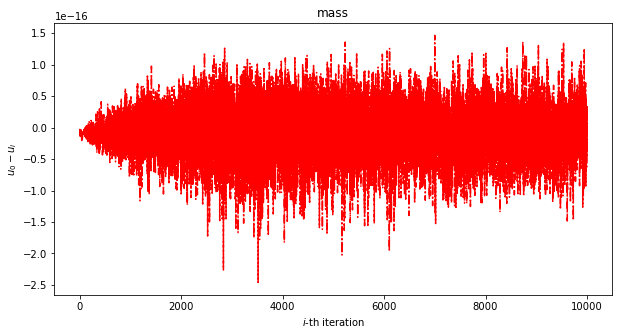

In [7]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.plot(periodic_mass_list, 'r-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
# plt.ylim(-1e-13,1e-13)
plt.show()

## Dirichlet 
\begin{equation}\displaystyle
    \begin{cases}
        u_t - u_{xx} = 0, &\text{for } x\in [0,L], t\geq 0, \\
        u(0,t)=\alpha, u(L,t)=\beta, &\text{for } t> 0, \\
        u(x,0)=f(x), &\text{for } x\in(0,L).
    \end{cases}
\end{equation}

In [6]:
# set dirichlet condition
u0[0] = 0
u0[-1] = 0


# dirichlet
k = dt/(dx**2)
diagonals = [k*np.ones(nx), (1-2*k)*np.ones(nx), k*np.ones(nx)]
offsets = [-1, 0, 1]
K_dirichlet = diags(diagonals, offsets, shape=(nx, nx), format='csr')

K_dirichlet[0,0] = 1
K_dirichlet[-1,-1] = 1
K_dirichlet[0,1] = 0
K_dirichlet[-1,-2] = 0

In [7]:
u_prev = u0
dirichlet_mass_list = []
history_u = [u0]
for i in range(0, timesteps):
    u = K_dirichlet * u_prev
    dirichlet_mass_list.append(sum(u0-u) * dx)
    history_u.append(u)
    u_prev = u

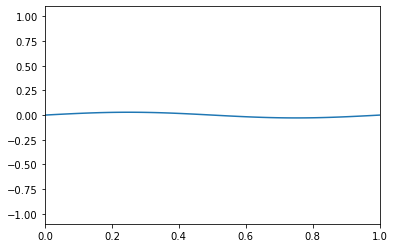

In [8]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0,L)
ax.set_ylim(-1.1, 1.1)
line, = ax.plot(0,0)

def animate(i):
    line.set_xdata(x)
    line.set_ydata(history_u[i])
    return line,

ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,timesteps,1000), blit=True)

# plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())

<Figure size 432x288 with 0 Axes>

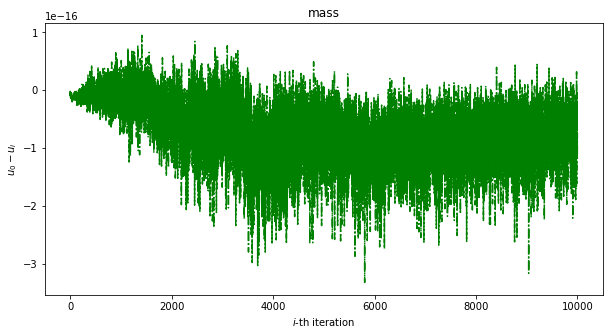

In [9]:
plt.figure(2)
plt.figure(figsize=(10,5))
# plt.plot(periodic_mass_list, 'r-')
plt.plot(dirichlet_mass_list, 'g-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
# plt.ylim(-1e-13,1e-13)
plt.show()

## Neumann 
\begin{equation}\displaystyle
    \begin{cases}
        u_t - u_{xx} = 0, &\text{for } x\in [0,L], t\geq 0, \\
        u_x(0,t)=\alpha,u_x(L,t)=\beta, &\text{fot } t> 0, \\
        u(x,0)=u_0(x), &\text{for } x\in(0,L).
    \end{cases}
\end{equation}

### Scheme

Let partition the spatial domain $[0,L]$ nonuniformly $0=x_0<x_{\frac{1}{2}}<x_{1+\frac{1}{2}}<\dots<x_{n-(1+\frac{1}{2})}<x_{n-\frac{1}{2}}<x_n=L$ , then we have the mesh grid $x_i=x_{\frac{1}{2}}+i\Delta x$ for $i=0,1,\dots,n-1$ and $x_{\frac{1}{2}}-x_0=x_{n}-x_{n-\frac{1}{2}}=\frac{1}{2}\Delta x$ , where $\Delta x = \dfrac{L}{n-2}$

The Neuman boundary $u_x(0,t)=\alpha$ and $u_x(L,t)=\beta$  can be approximated by forward and backward difference respectively.

$$u_x(0,t_k) \approx \dfrac{u^k_{\frac{1}{2}}-u^k_0}{\frac{\Delta x}{2}}=\alpha, \, u_x(L,t_k) \approx \dfrac{u^k_n-u^k_{n-\frac{1}{2}}}{\frac{\Delta x}{2}}=\beta$$

$$u^k_{\frac{1}{2}} = u^k_0 + \dfrac{\Delta x}{2}\alpha, \, u^k_n = u^k_{n-\frac{1}{2}} + \dfrac{\Delta x}{2}\beta$$

Then the scheme numerical approximation at boundary is $$\dfrac{u^{k+1}_0-u^k_0}{\Delta t} \approx \dfrac{u^k_1-u^k_0}{\Delta x}$$ and $$\dfrac{u^{k+1}_n-u^k_n}{\Delta t} \approx \dfrac{u^k_n-u^k_{n-1}}{\Delta x}$$

Hence, we have the linear system $$u^{k+1}_i=u^k_i+\epsilon^2 \dfrac{\Delta t}{(\Delta x)^2} (u^k_{i-1}-2u^k_i+u^k_{i+1}), \text{ for } i=1,2,\dots,n-2,n-1,$$ and $$u^{k+1}_0 = u^k_0 + \epsilon^2 \dfrac{\Delta t}{\Delta x} (u^k_1-u^k_0), \, u^{k+1}_{n} = u^k_{n} + \epsilon^2 \dfrac{\Delta t}{\Delta x} (u^k_n-u^k_{n-1}).$$

In the martix form
$$ A=
\begin{bmatrix}
    1-k_1 & k_1 & 0 & \dots & \dots & \dots & \dots & 0 \\
    k_0 & 1-2k_0 & k_0 & 0 & \dots & \dots & \dots & 0 \\
    0 & k_0 & 1-2k_0 & k_0 & 0 & \dots & \dots & 0  \\
    0 & 0 & k_0 & 1-2k_0 & k_0 & 0 & \dots & 0 \\
    \vdots & & \ddots & \ddots & \ddots & \ddots & \ddots &\vdots\\
    0 & 0 & \dots & 0 & k_0 & 1-2k_0 & k_0 & 0 \\
    0 & 0 & \dots & 0 & 0 & k_0 & 1-2k_0 & k_0 \\
    0 & \dots & \dots & \dots & \dots & 0 & k_1 & 1-k_1
\end{bmatrix}
$$, where $k_0=\dfrac{\Delta t}{(\Delta x)^2}$ and $k_1=\dfrac{\Delta t}{\Delta x}$.

$$U^{k+1}=AU^k$$

In [10]:
# Diffusion eqaution with Neumann
k0 = dt/(dx**2)
k1 = dt/dx
diagonals = [k0*np.ones(nx), (1-2*k0)*np.ones(nx), k0*np.ones(nx)]
offsets = [-1, 0, 1]
K_neumann = diags(diagonals, offsets, shape=(nx, nx), format='csr')
K_neumann[0,0] = K_neumann[-1,-1] = 1-k1
K_neumann[0,1] = K_neumann[-1,-2] = k1
# K_neumann[-1,-1] = 1-k1
# K_neumann[-1,-2] = k1

u0 = np.sin(2*np.pi*x)

In [11]:
u_prev = u0
neumann_mass_list = []
history_u = [u0]
for i in range(0, timesteps):
    u = K_neumann * u_prev
    neumann_mass_list.append(sum(u0-u) * dx)
    history_u.append(u)
    u_prev = u

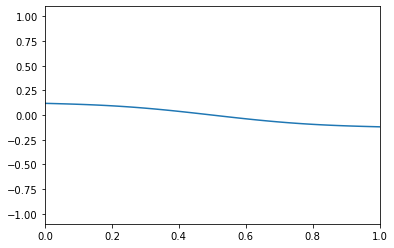

In [12]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0,L)
ax.set_ylim(-1.1, 1.1)
line, = ax.plot(0,0)

def animate(i):
    line.set_xdata(x)
    line.set_ydata(history_u[i])
    return line,

ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,timesteps,1000), blit=True)

# plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())

## mass

$$\int^{L}_0 u(s,t) ds = \sum^{n-1}_{i=0} \int^{x_{i+1}}_{x_i} u(s,t) ds$$

midpoint method

$$\int^{x_{i+1}}_{x_i} u(s,t) \approx u\left(x_{i+\frac{1}{2}},t\right)\Delta x,$$
where $x_{i+\frac{1}{2}}=\dfrac{x_i+x_{i+1}}{2}$ is the midpoint of $x_i$ and $x_{i+1}.$

Hence, the numerical integration is $$\int^{L}_0 u(s,t) ds = \sum^{n-1}_{i=0} \int^{x_{i+1}}_{x_i} u(s,t) ds \approx \sum^{n-1}_{i=0} u\left(x_{i+\frac{1}{2}},t\right)\Delta x$$

One way to achieve this is by imposing a condition on the flux of the diffusing substance across the boundary, which ensures that the total mass of the substance is conserved over time. Specifically, we can specify Neumann boundary conditions of the form:

$\frac{\partial u}{\partial x}(0, t) = -D\frac{u(0, t) - u_0}{h}$

$\frac{\partial u}{\partial x}(L, t) = D\frac{u(L, t) - u_L}{h}$

where $D$ is the diffusion coefficient, $u_0$ and $u_L$ are the prescribed values of the concentration at the boundaries, and $h$ is the grid spacing. These boundary conditions ensure that the flux of the diffusing substance across the boundary is proportional to the difference between the prescribed concentration and the actual concentration at the boundary.

Note that these boundary conditions are only valid if $u_0$ and $u_L$ are chosen such that the total mass of the substance is conserved. Specifically, we need to choose $u_0$ and $u_L$ such that:

$\int_0^L u(x, 0)dx = \int_0^L u(x, t)dx = M$

where $M$ is the total mass of the substance. This can be achieved by choosing the initial concentration profile to be integrable over the domain, and by choosing $u_0$ and $u_L$ to satisfy the following condition:

$u_0 + u_L = \frac{2M}{L}$

With these boundary conditions and initial condition, the diffusion equation will conserve mass over time.

<Figure size 432x288 with 0 Axes>

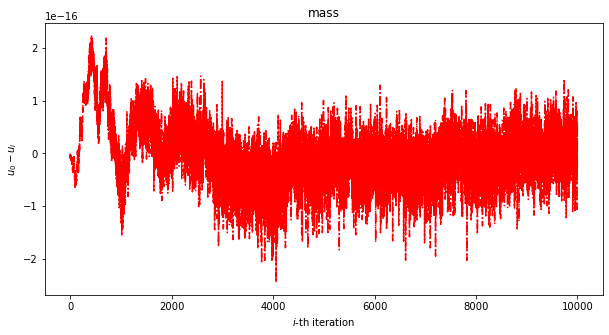

In [13]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.plot(neumann_mass_list, 'r-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
# plt.ylim(-1e-13,1e-13)
plt.show()

<Figure size 432x288 with 0 Axes>

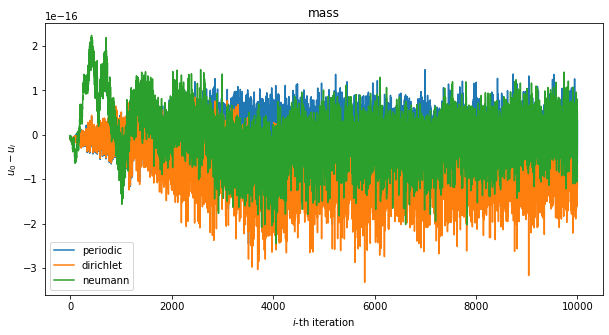

In [14]:
plt.figure(3)
plt.figure(figsize=(10,5))
plt.plot(periodic_mass_list)
plt.plot(dirichlet_mass_list)
plt.plot(neumann_mass_list)
plt.legend(['periodic','dirichlet','neumann'])
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
# plt.ylim(-1e-13,1e-13)
plt.show()